In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, zscore
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

### Leitura e visualização dos dados

In [3]:
df_irrigacao = pd.read_csv('./dataset/dados_de_irrigacao.csv')

In [4]:
df_irrigacao

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
...,...,...,...
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667


In [5]:
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


### EDA - Análise Exploratória dos dados

In [6]:
df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

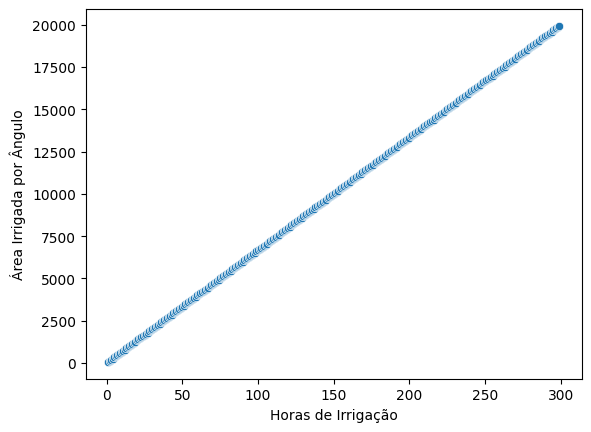

In [7]:
# Plot de dispersão
# X = Horas de irrigação - variavel independente
# y =  Àrea Irrigada - variavel dependente
sns.scatterplot(data=df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

<Axes: ylabel='Horas de Irrigação'>

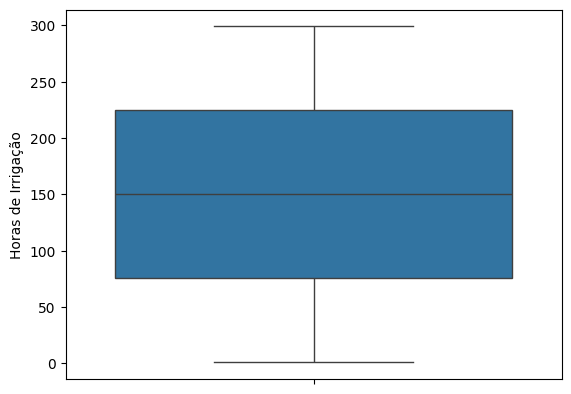

In [8]:
# Verificar se termos outiers
sns.boxplot(data=df_irrigacao, y='Horas de Irrigação')

<Axes: ylabel='Área Irrigada'>

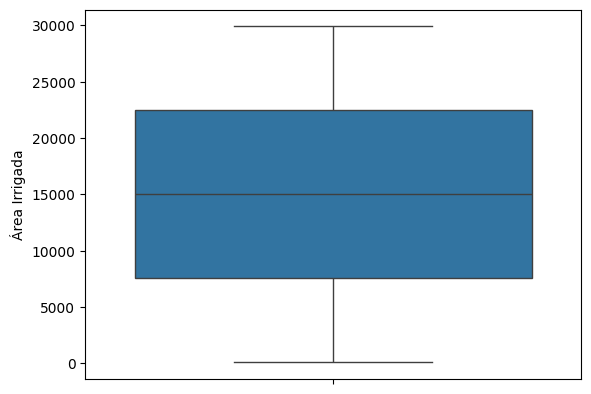

In [9]:
sns.boxplot(data=df_irrigacao, y='Área Irrigada')

<Axes: ylabel='Área Irrigada por Ângulo'>

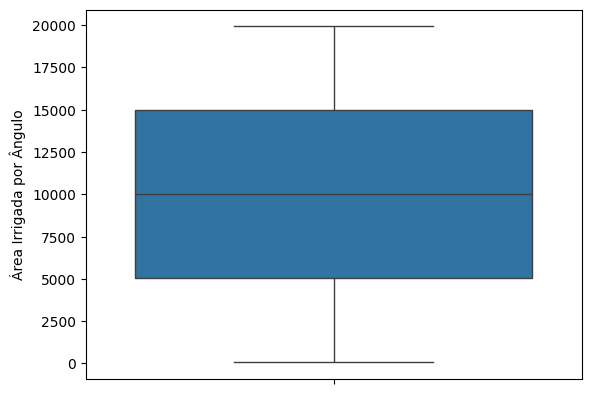

In [10]:
sns.boxplot(data=df_irrigacao, y='Área Irrigada por Ângulo')

#### Sem outliers

<Axes: >

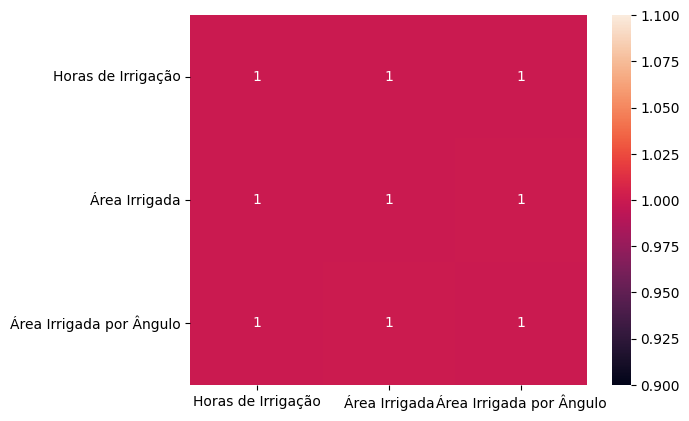

In [11]:
# Verificar a correlação entre as variáveis
sns.heatmap(df_irrigacao.corr('pearson'), annot=True)

<Axes: >

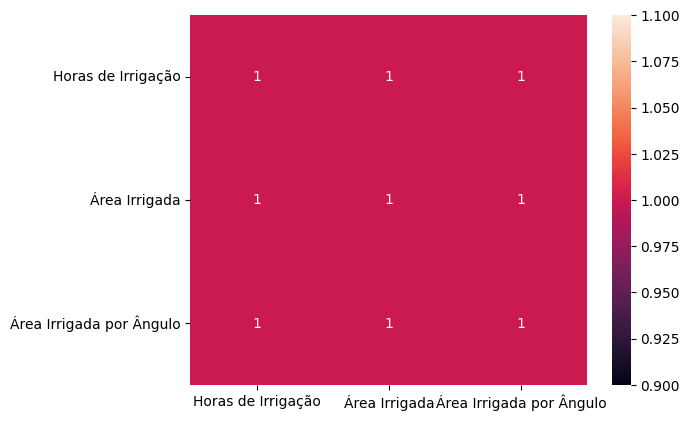

In [12]:
# Verificar correlação de acordo com spearman
sns.heatmap(df_irrigacao.corr('spearman'), annot=True)

As variaveis apresenta uma correlação muito forte

<Axes: xlabel='Horas de Irrigação', ylabel='Count'>

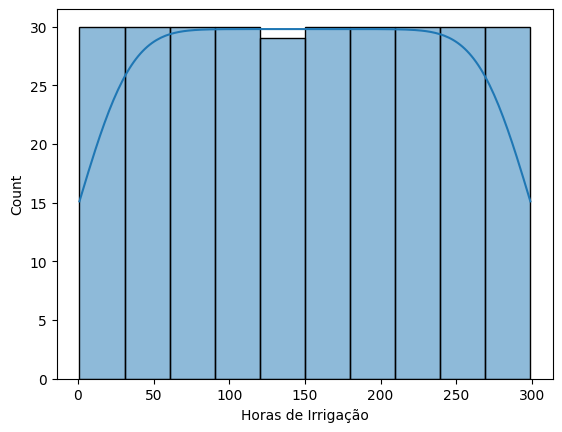

In [13]:
# Histograma das variáveis
sns.histplot(df_irrigacao, x='Horas de Irrigação', kde=True)

<Axes: xlabel='Área Irrigada', ylabel='Count'>

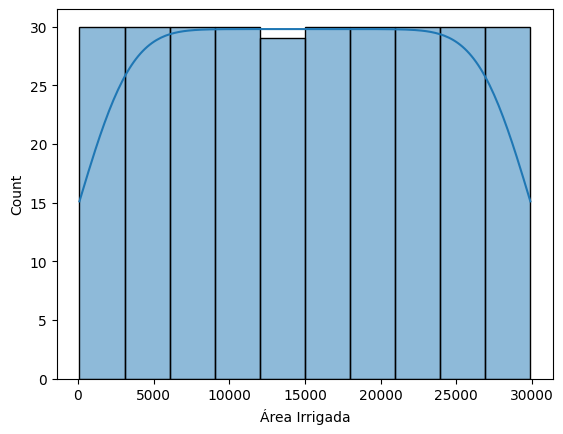

In [14]:
sns.histplot(df_irrigacao, x='Área Irrigada', kde=True)

### Modelo de Regressão Linear

In [15]:
# Dividir os dados em conjunto de treino e teste
X = df_irrigacao['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)
# 30% de teste e 70% de treino

In [17]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
reg_model.intercept_[0]

np.float64(3.637978807091713e-12)

In [31]:
print('y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

y = 66.666667x + 0.000000


### Avaliação do Modelo

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# prdição dos valores
y_pred = reg_model.predict(X_test)

# MSE
mean_squared_error(y_test, y_pred)


5.0788674199138044e-24

In [43]:
# MAE
mean_absolute_error(y_test, y_pred)

1.8764644159495625e-12

In [40]:
r2_score(y_test, y_pred)

1.0

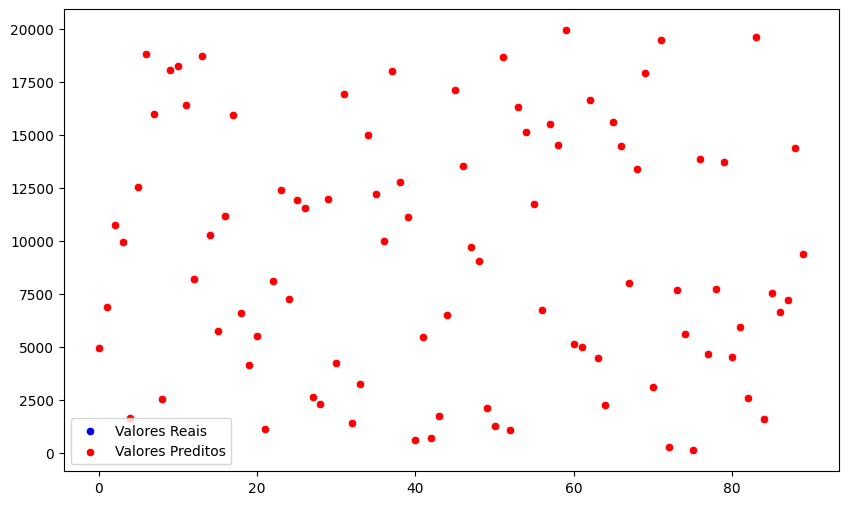

In [48]:
# grafico dos resultados reais e preditos
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

A chance de error é muito pouca, assim o modelo pode fazer previsões mais precisas

### Análise de Resíduos

In [50]:
residuos = y_test - y_pred

In [ ]:
# padronizando os residuos
residuos_std = zscore(residuos)

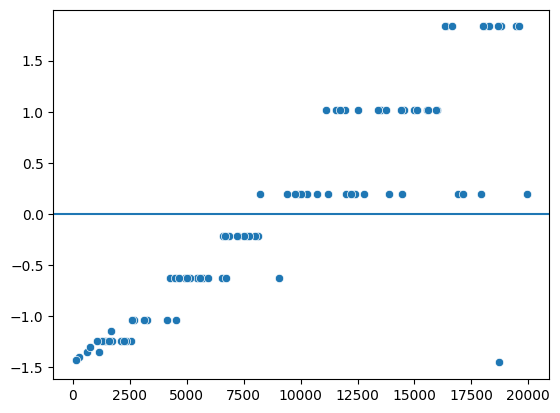

In [ ]:
# grafico para verificar a normalidade e linearidade dos residuos
# modelo 1
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

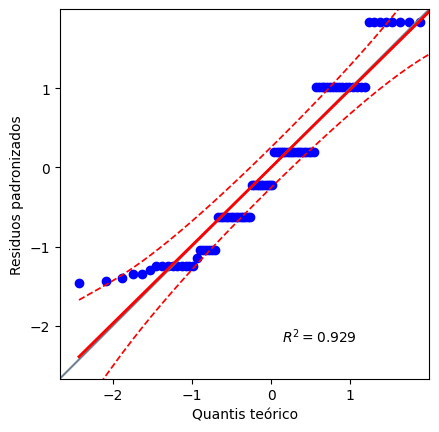

In [55]:
# QQ (quantile-quantile) plot
# modelo 2
pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel('Quantis teórico')
plt.ylabel('Residuos padronizados')
plt.show()

Foi verificado muitos residuos fora da curva

In [ ]:
#  Teste de Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos_std.reshape(-1))

In [59]:
print('Teste de Shapiro-Wilk:', stat_shapiro)
print('P-Value:', p_value_shapiro)

Teste de Shapiro-Wilk: 0.9188782351154264
P-Value: 3.1508142990658163e-05


Rejeitamos H0, ou seja, nao segue uma distribuição normal, pois p-valor < 0.5

In [60]:
#  Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos_std.reshape(-1), 'norm')

In [61]:
print('Teste de Kolmogorov-Smirnov:', stat_ks)
print('P-Value:', p_value_ks)

Teste de Kolmogorov-Smirnov: 0.1360889176760255
P-Value: 0.06475175694403168


Aceitamos o H0

#### Predições como exemplo

In [64]:
# Utilize o modelo para fazer predições. Por exemplo, preveja a área irrigada por ângulo para 15 horas de irrigação.
reg_model.predict([[15]])

array([[1000.]])

In [65]:
# Inverso
# (Y-B)/A
(1000 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(14.99999999999995)